<a href="https://colab.research.google.com/github/younesabdolmalaky/Pistachio/blob/main/OnFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install imblearn

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muratkokludataset/pistachio-image-dataset
! unzip /content/pistachio-image-dataset.zip

 64% 17.0M/26.7M [00:00<00:00, 91.0MB/s]
100% 26.7M/26.7M [00:00<00:00, 114MB/s] 
Archive:  /content/pistachio-image-dataset.zip
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xls  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset_Citation_Request.txt  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.arff  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset_Citation_Request.txt  
  inflati

In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('/content/Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls')

In [3]:
df.isnull().sum().sum()

0

<Axes: >

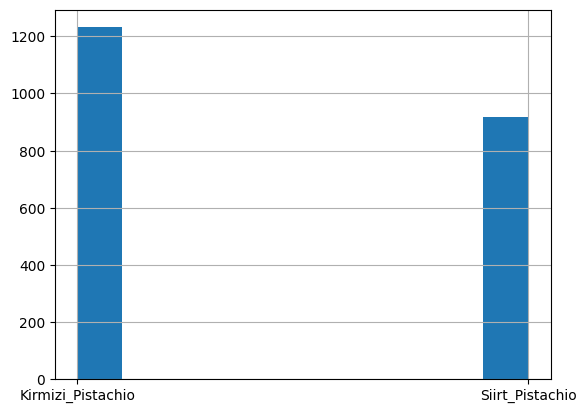

In [5]:
df['Class'].hist()

In [7]:
y = df['Class']
X = df.drop('Class' , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

Number transactions X_train dataset:  (1718, 28)
Number transactions y_train dataset:  (1718,)
Number transactions X_test dataset:  (430, 28)
Number transactions y_test dataset:  (430,)


In [8]:
print("Before OverSampling, counts of label 'Kirmizi_Pistachio': {}".format(sum(y_train == 'Kirmizi_Pistachio')))
print("Before OverSampling, counts of label 'Siirt_Pistachio': {} \n".format(sum(y_train == 'Siirt_Pistachio')))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'Kirmizi_Pistachio': {}".format(sum(y_train_res == 'Kirmizi_Pistachio')))
print("After OverSampling, counts of label 'Siirt_Pistachio': {}".format(sum(y_train_res == 'Siirt_Pistachio')))


Before OverSampling, counts of label 'Kirmizi_Pistachio': 982
Before OverSampling, counts of label 'Siirt_Pistachio': 736 

After OverSampling, the shape of train_X: (1964, 28)
After OverSampling, the shape of train_y: (1964,) 

After OverSampling, counts of label 'Kirmizi_Pistachio': 982
After OverSampling, counts of label 'Siirt_Pistachio': 982


In [14]:
clf = RandomForestClassifier()
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.93      0.92      0.92       250
  Siirt_Pistachio       0.89      0.90      0.90       180

         accuracy                           0.91       430
        macro avg       0.91      0.91      0.91       430
     weighted avg       0.91      0.91      0.91       430

